In [1]:
!nvidia-smi

Sat Oct 15 08:27:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST

In [3]:
mnist = MNIST(root='data', 
              train = True,
              download = True, 
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,)   #Normalisation
                                                       )]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
img, label = mnist[0]
print('label:', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

label: 5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


(tensor(-1.), tensor(1.))

In [5]:
def denorm(x):
  Out = (x+1)/2
  return Out.clamp(0,1)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


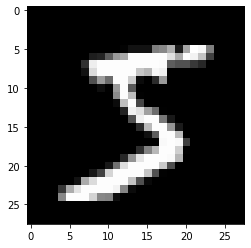

In [7]:
img_norm = denorm(img)
plt.imshow(img_norm[0], cmap = 'gray')
print('Label:', label)
print(img[:,10:15,10:15])

In [8]:
print(img_norm[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


# DEVICE CONFIGURATION

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

#DataLoaders

In [10]:
from torch.utils.data import DataLoader
batch_size = 100
dataloader = DataLoader(mnist,batch_size, shuffle = True)

first batch:
torch.Size([100, 1, 28, 28])
tensor([8, 8, 7, 7, 7, 7, 0, 3, 5, 0, 7, 4, 7, 5, 4, 7, 5, 9, 1, 8, 4, 9, 8, 0,
        6, 7, 2, 4, 2, 9, 5, 1, 7, 0, 2, 9, 9, 7, 8, 2, 2, 4, 2, 0, 5, 8, 6, 8,
        6, 5, 5, 8, 0, 3, 6, 1, 0, 6, 5, 3, 7, 6, 0, 7, 3, 8, 3, 1, 4, 1, 1, 5,
        2, 8, 7, 8, 2, 3, 1, 0, 8, 1, 6, 7, 2, 7, 7, 5, 9, 5, 0, 7, 2, 3, 3, 3,
        6, 4, 4, 1])


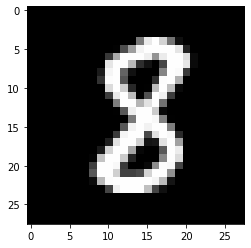

In [11]:
for img_batch, label_batch in dataloader:
  print('first batch:')
  print(img_batch.shape)
  plt.imshow(img_batch[0][0], cmap = 'gray')
  print(label_batch)
  break

#Discriminator

In [12]:
image_size = 784      #input_size
hidden_size = 256     

In [13]:
import torch.nn as nn
Discriminator = nn.Sequential(
                              nn.Linear(image_size, hidden_size),
                              nn.LeakyReLU(0.2),
                              nn.Linear(hidden_size, hidden_size),
                              nn.LeakyReLU(0.2),
                              nn.Linear(hidden_size, hidden_size),
                              nn.LeakyReLU(0.2),
                              nn.Linear(hidden_size, 1),
                              nn.Sigmoid()
                              )
#with LeakyRelu of 0.2
#one extra layer

In [14]:
Discriminator.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): LeakyReLU(negative_slope=0.2)
  (6): Linear(in_features=256, out_features=1, bias=True)
  (7): Sigmoid()
)

#Generator

In [15]:
latent_size = 64    #input vector size

Generator = nn.Sequential(nn.Linear(latent_size, hidden_size),
                          nn.ReLU(),
                          nn.Linear(hidden_size, hidden_size),
                          nn.ReLU(),
                          nn.Linear(hidden_size, hidden_size),
                          nn.ReLU(),
                          nn.Linear(hidden_size, image_size),
                          nn.Tanh()
                          )

#one extra layer

In [16]:
y = Generator(torch.randn(2,latent_size))   #Generate 2 random vectors of latent_size(64)
y.shape

torch.Size([2, 784])

In [17]:
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())
gen_imgs.shape

torch.Size([2, 28, 28])

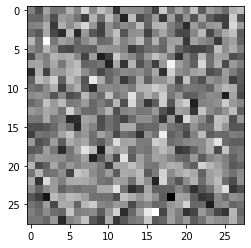

In [18]:
plt.imshow(gen_imgs[0], cmap='gray')

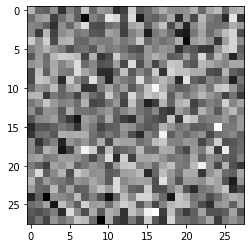

In [19]:
plt.imshow(gen_imgs[1], cmap='gray')

In [20]:
Generator.to(device)

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Linear(in_features=256, out_features=784, bias=True)
  (7): Tanh()
)

# Train Discriminator

In [21]:
Criterion = nn.BCELoss()
Discriminator_optimizer = torch.optim.Adam(Discriminator.parameters(), lr = 0.0004)  #Higher learning rate
Generator_optimizer = torch.optim.Adam(Generator.parameters(), lr = 0.0002)         

In [22]:
def reset_grad():
  Discriminator_optimizer.zero_grad()
  Generator_optimizer.zero_grad()

In [26]:
def train_discriminator(images):

  real_labels = torch.ones(batch_size,1).to(device)
  fake_labels = torch.ones(batch_size,1).to(device)
  #Label smoothing to 0.9,0.1:
  real_labels *= 0.9                                            
  fake_labels *=0.1

  Outputs = Discriminator(images)
  d_loss_real = Criterion(Outputs, real_labels)
  real_score = Outputs


  z = torch.randn(batch_size, latent_size).to(device)
  fake_images = Generator(z)
  Outputs = Discriminator(fake_images)
  d_loss_fake = Criterion(Outputs, fake_labels)
  fake_score = Outputs

  
  d_loss = d_loss_real + d_loss_fake



  reset_grad()
  d_loss.backward()
  Discriminator_optimizer.step()
  return d_loss, real_score, fake_score

# Train Generator

In [27]:
def train_generator():
  z = torch.randn(batch_size, latent_size).to(device)
  fake_images = Generator(z)
  labels = torch.ones(batch_size, 1).to(device)

  g_loss = Criterion(Discriminator(fake_images), labels)
  reset_grad()
  g_loss.backward()
  Generator_optimizer.step()
  return g_loss, fake_images

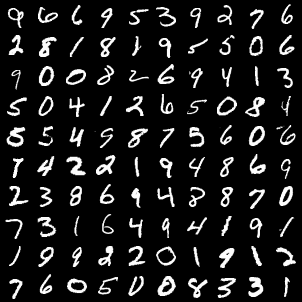

In [28]:
import os
sample_dir = 'samples'
if not os.path.exists(sample_dir):
  os.makedirs(sample_dir)

from IPython.display import Image
from torchvision.utils import save_image

for images,_ in dataloader:
  images = images.reshape(images.size(0),1,28,28)
  save_image(denorm(images),os.path.join(sample_dir, 'real_images.png'), nrow = 10)
  break
Image(os.path.join(sample_dir, 'real_images.png'))


In [29]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)

In [30]:
def save_fake_images(index):
  fake_images = Generator(sample_vectors)
  fake_images = fake_images.reshape(fake_images.size(0), 1,28,28)

  fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
  print('saving:', fake_fname)
  save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow = 10)

saving: fake_images-0000.png


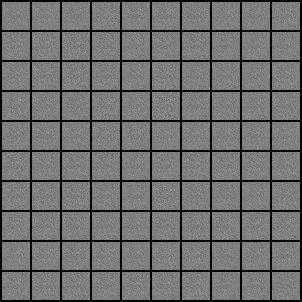

In [31]:
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

In [32]:
num_epochs = 350    #additional 50 epochs
total_step = len(dataloader)
d_losses, g_losses, real_scores, fake_scores = [],[],[],[]

#Training:

In [33]:
%%time

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(dataloader):

        images = images.reshape(batch_size, -1).to(device)
        

        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()
        

        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
        

    save_fake_images(epoch+1)   


Epoch [0/350], Step [200/600], d_loss: 0.6604, g_loss: 2.5014, D(x): 0.87, D(G(z)): 0.11
Epoch [0/350], Step [400/600], d_loss: 0.6911, g_loss: 2.4727, D(x): 0.85, D(G(z)): 0.05
Epoch [0/350], Step [600/600], d_loss: 0.6563, g_loss: 2.6346, D(x): 0.90, D(G(z)): 0.12
saving: fake_images-0001.png
Epoch [1/350], Step [200/600], d_loss: 1.1966, g_loss: 1.7053, D(x): 0.66, D(G(z)): 0.44
Epoch [1/350], Step [400/600], d_loss: 2.5398, g_loss: 0.9205, D(x): 0.36, D(G(z)): 0.70
Epoch [1/350], Step [600/600], d_loss: 0.7722, g_loss: 3.5402, D(x): 0.93, D(G(z)): 0.08
saving: fake_images-0002.png
Epoch [2/350], Step [200/600], d_loss: 0.8628, g_loss: 1.6717, D(x): 0.84, D(G(z)): 0.24
Epoch [2/350], Step [400/600], d_loss: 0.7590, g_loss: 2.7325, D(x): 0.90, D(G(z)): 0.14
Epoch [2/350], Step [600/600], d_loss: 0.7011, g_loss: 2.1402, D(x): 0.90, D(G(z)): 0.15
saving: fake_images-0003.png
Epoch [3/350], Step [200/600], d_loss: 0.7681, g_loss: 1.8583, D(x): 0.84, D(G(z)): 0.21
Epoch [3/350], Step [40

#Save Models


In [34]:
torch.save(Generator.state_dict(), 'Generator.ckpt')
torch.save(Discriminator.state_dict(), 'Discriminator.ckpt')

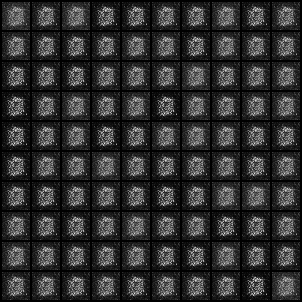

In [35]:
Image('./samples/fake_images-0001.png')

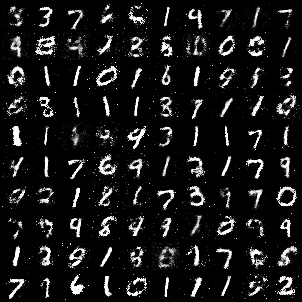

In [36]:
Image('./samples/fake_images-0050.png')

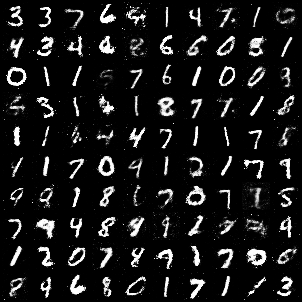

In [37]:
Image('./samples/fake_images-0100.png')

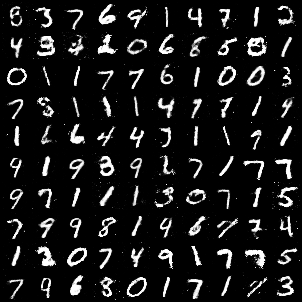

In [42]:
Image('./samples/fake_images-0200.png')

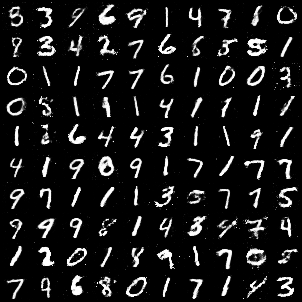

In [43]:
Image('./samples/fake_images-0250.png')


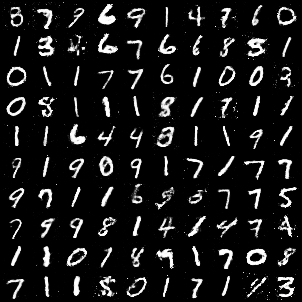

In [44]:
Image('./samples/fake_images-0300.png')


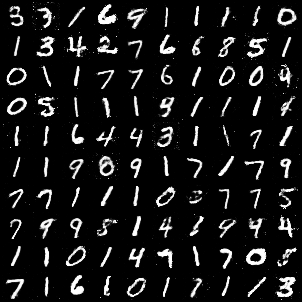

In [45]:
Image('./samples/fake_images-0350.png')


In [38]:
import cv2
import os
from IPython.display import FileLink

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

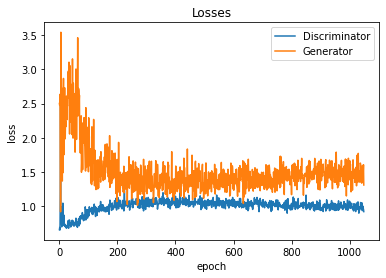

In [39]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

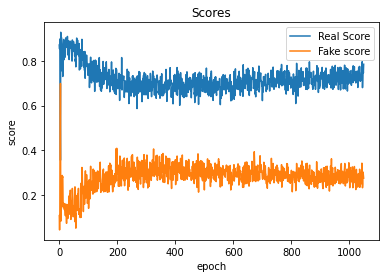

In [40]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

In [41]:
!zip -r /content/samples.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2022.10.07/ (stored 0%)
  adding: content/.config/logs/2022.10.07/13.34.49.852351.log (deflated 55%)
  adding: content/.config/logs/2022.10.07/13.34.50.628315.log (deflated 53%)
  adding: content/.config/logs/2022.10.07/13.34.17.754134.log (deflated 86%)
  adding: content/.config/logs/2022.10.07/13.33.29.962578.log (deflated 91%)
  adding: content/.config/logs/2022.10.07/13.33.55.059309.log (deflated 53%)
  adding: content/.config/logs/2022.10.07/13.34.26.675197.log (deflated 53%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
 